# Simulation Test

In [1]:
from code.Parameters import *
from code.Simulator import Simulator
from code.Utility import Utility
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# SIMULATION 
simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib )


Average Genome Length: 12672797.53125 
Initial Genome Length: 8000000


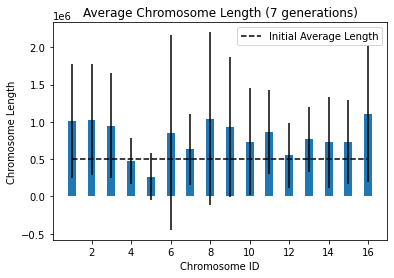

In [3]:
# AVERAGES
initial_genome_len = sum([len(seq) for id, seq in chromosome_table])
initial_ave_len = initial_genome_len / len(chromosome_table)
print("\nAverage Genome Length:", simul.average_genome_length, "\nInitial Genome Length:", initial_genome_len)

# BOX PLOT
fig, ax = plt.subplots()
plt.bar(range(1, len(chromosome_table) + 1), simul.average_chromosome_length, \
    yerr = simul.chr_length_st_dev, width = 0.4)
    
ax.plot([1., len(chromosome_table)], [initial_ave_len, initial_ave_len], "k--", label = "Initial Average Length")
plt.xlabel("Chromosome ID")
plt.ylabel("Chromosome Length")
plt.title(f"Average Chromosome Length ({number_of_generations} generations)")
plt.legend()
plt.show()

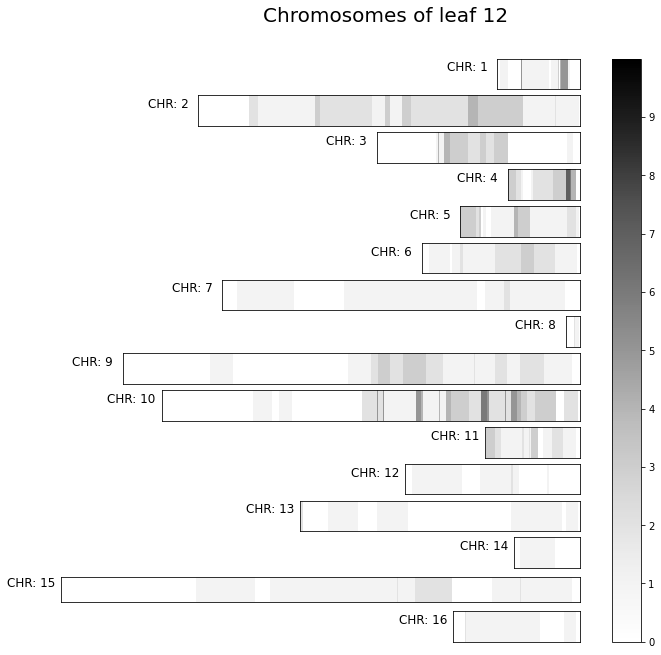

In [5]:
n_leaf = 12
scale_max_value = 10


data = []
fig, axs = plt.subplots(16, figsize = (9,9))

fig.suptitle(f'Chromosomes of leaf {n_leaf}', fontsize = 20)
for id in range(1,17):
    ax = axs[id-1]
    data.append([np.array(simul.leaves[n_leaf].DNA.CHRs[id-1].visual)])
    
    im = ax.imshow(data[id-1], aspect = 100000*len(data[id-1]),cmap='Greys', vmin = 0, vmax = scale_max_value, interpolation='nearest')
    ax.set_ylabel(f"CHR: {id}", rotation=0, fontsize=12, labelpad=30)
    ax.xaxis.get_label()
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_xaxis().set_ticks([])

fig.subplots_adjust(bottom=0., top=0.9, left=0., right=1,
                    wspace=10, hspace=0.2)
cbar = fig.colorbar(im, ax=axs.ravel().tolist(),  shrink=1.0)
cbar.set_ticks(np.arange(0, scale_max_value, 1))

plt.show()
